# ObsID : 0827211301, SRCNUM : 20, Instru : EPN
Not on Simbad. Previous observation of the source ObsID : 0945020137, SRCNUM : 21

In [1]:
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import numpy as np

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

plt.rcParams['figure.figsize'] = [12,7]

Fit.statMethod = "chi"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4

Default fit statistic is set to: Chi-Squared
   This will apply to all current and newly loaded spectra.
Parameter delta values for fits will now be 0.0001 * parValue


In [3]:
spec_fnames = glob.glob('P*PNS*SRSPEC*.FTZ')
Spectrum(spec_fnames[0])

Plot.xAxis="keV"
Plot.device = "/xs"
Plot.xLog=True
Plot.yLog=True
Plot.addCommand("Rescale Y 0.00001 0.005")
Plot("data")


1 spectrum  in use
 
Spectral Data File: P0827211301PNS003SRSPEC0014.FTZ  Spectrum 1
Net count rate (cts/s) for Spectrum:1  3.725e-03 +/- 6.245e-04 (38.3 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-12
  Telescope: XMM Instrument: EPN  Channel Type: PI
  Exposure Time: 2.522e+04 sec
 Using fit statistic: chi
 Using Background File                P0827211301PNS003BGSPEC0014.FTZ
  Background Exposure Time: 2.522e+04 sec
 Using Response (RMF) File            epn_e3_ff20_sdY4.rmf for Source 1
 Using Auxiliary Response (ARF) File  P0827211301PNS003SRCARF0014.FTZ



(-0.5, 862.5, 662.5, -0.5)

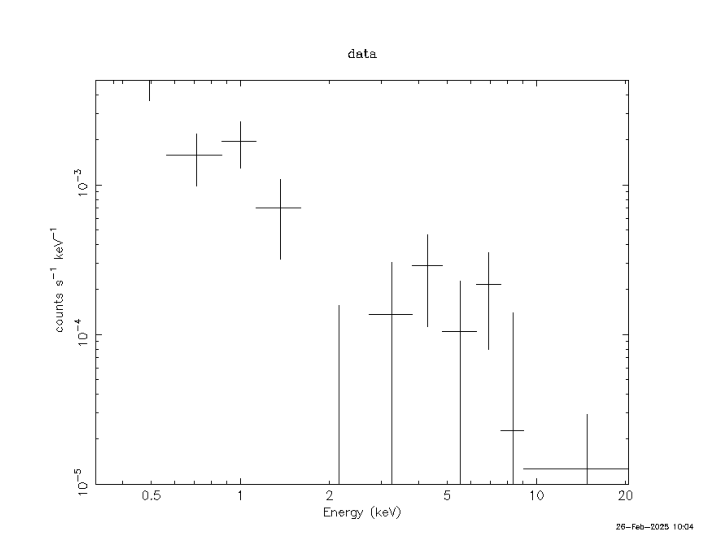

In [5]:
img = plt.imread(glob.glob('*Spectrum.png')[0])
plt.imshow(img)
plt.axis('off')

### Black body model

In [6]:
AllModels.clear()
mo = Model("tbabs*bbody")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross sections as a baseline.

Fit statistic  : Chi-Squared              4.836971e+11     using 12 bins.

Te

**Mauvaise qualité d’ajustement :**
- Statistique de chi2 élevée :  χ^2=45.4 pour 9 degrés de liberté, ce qui donne un réduit de χ^2=45.4/9=5.04
    - Un bon ajustement aurait un χ^2 proche de 1. Ici, la valeur est trop élevée, ce qui signifie que le modèle ne correspond pas bien aux données.
- Paramètre N_H pegged (bloqué à 4.94e-17) : La colonne densité (absorption interstellaire) est bloquée à une valeur extrêmement basse.
Problème : Cela signifie que Xspec trouve que l'absorption n’a aucun effet sur les données, ce qui est suspect.
- Paramètres avec des erreurs anormalement grandes :
    - Température 𝑘_𝑇=3.11 keV avec une incertitude de ±2.78 keV. Cela indique que la température est mal contrainte.
    - Normalisation norm=3.75×10^−6 avec une grande erreur relative. Indique aussi un mauvais ajustement.

(-0.5, 859.5, 661.5, -0.5)

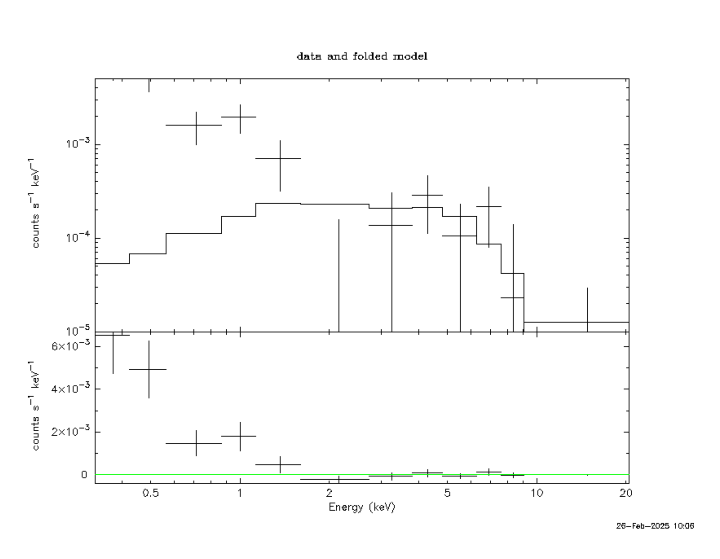

In [7]:
img = plt.imread(glob.glob('*Spectrum_bbody.png')[0])
plt.imshow(img)
plt.axis('off')

### Bremsstrahlung model

In [8]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              3.915256e+10     using 12 bins.

Test statistic : Chi-Squared              3.915256e+10     using 12 bins.
 Null hypothesis probability of 0.000000e+00 with 9 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
46.0693      0.49976      -1      0.205368       49.5956   4.50255e-06
38.3434      218524       -2     0.0981896       198.578   2.90771e-05
36.7898      127052       -2     0.0462162       199.248   3.10340e-05
3

(-0.5, 859.5, 661.5, -0.5)

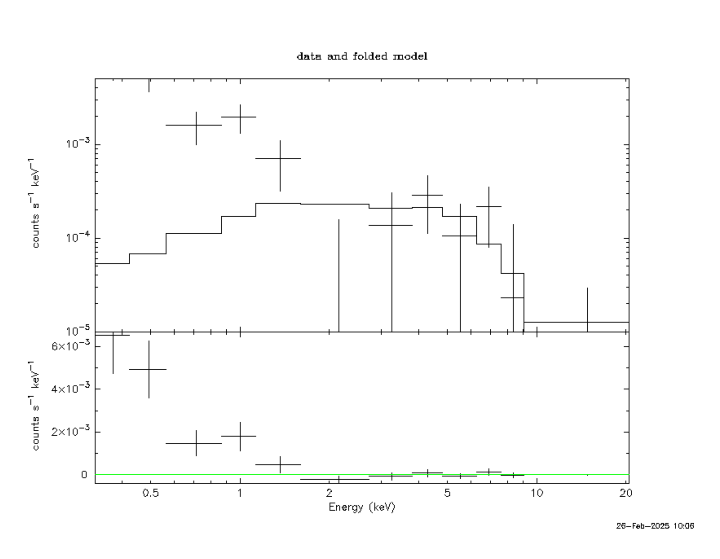

In [9]:
img = plt.imread(glob.glob('*Spectrum_bbody.png')[0])
plt.imshow(img)
plt.axis('off')

### Apec model

In [10]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : Chi-Squared              8.934849e+09     using 12 bins.

Test statistic : Chi-Squared              8.934849e+09     using 12 bins.
 Null hypothesis probability of 0.000000e+00 with 9 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        5:norm
41.5772      2.67419      -1      0.883022      0.393377   3

(-0.5, 860.5, 662.5, -0.5)

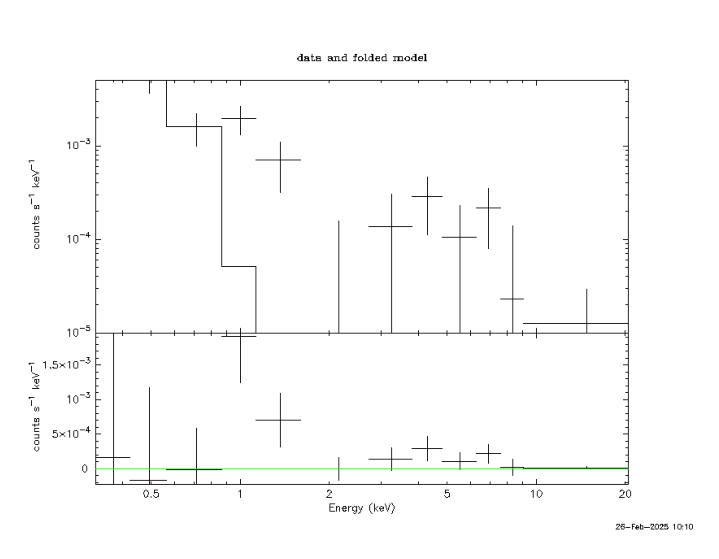

In [11]:
img = plt.imread(glob.glob('*Spectrum_apec.png')[0])
plt.imshow(img)
plt.axis('off')

### Powerlaw model

In [12]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              1.809368e+11     using 12 bins.

Test statistic : Chi-Squared              1.809368e+11     using 12 bins.
 Null hypothesis probability of 0.000000e+00 with 9 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
47.4785      0.357288     -1      0.467904      0.257761   1.64636e-06
44.1211      279813        0     0.0911776      0.175809   1.55663e-06
42.5717      516475        0     0.0204134      0.183397   1.54585e-06

(-0.5, 857.5, 662.5, -0.5)

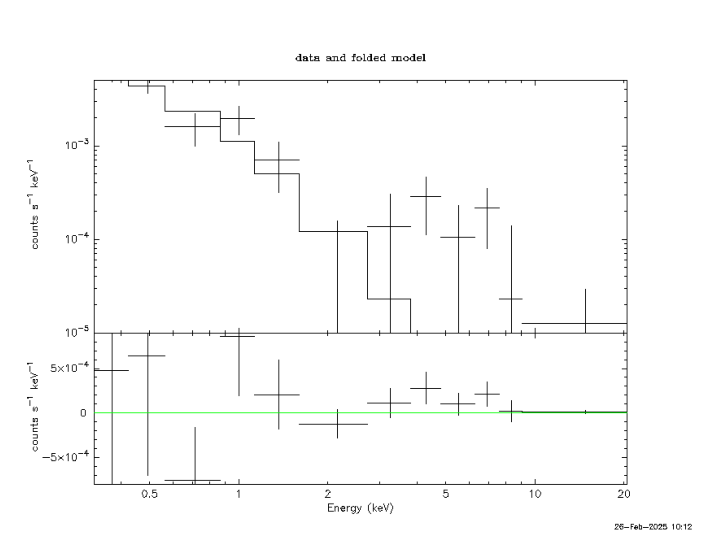

In [13]:
img = plt.imread(glob.glob('*Spectrum_powerlaw.png')[0])
plt.imshow(img)
plt.axis('off')

## Flux

In [14]:
AllModels.calcFlux(".2 12.0")

 Model Flux 6.1985e-05 photons (4.1524e-14 ergs/cm^2/s) range (0.20000 - 12.000 keV)


In [15]:
Flux = 4.1524e-14 # ergs/cm^2/s

### ESASky

https://sky.esa.int/esasky/?target=52.73769389063616%20-28.634488186049&hips=GALEX+GR6%2F7+AIS+color&fov=0.182241278518&projection=SIN&cooframe=J2000&sci=true&lang=fr

``EPIC Stack``
- Stack Catalogue name : 4XMMs J033057.0-283804
- IAU name : 4XMM J033056.9-283804
- RA : 03h 30m 57.047s
- DEC : -28° 38' 04.16"

### Luminosity
No distance available.